# Esercitazione 7 - Clustering

Oggi introduciamo algoritmi non-supervisionati che permettono di calcolare *cluster*.
Intuitivamente, un *cluster* è un raggruppamento di dati in base alle loro similarità.
Nel caso del dataset dei pinguini, possiamo isolare tre cluster, ossia uno per specie.

**ATTENZIONE**: non-supervisionati significa che NON possediamo le etichette y dei dati.
Quindi possiamo fare affidamento **SOLO** su come sono disopsti nello spazio.

<a target="_blank" href="https://colab.research.google.com/github/zangobot/BusinessAnalytics_TeachingMaterial/blob/main/Esercitazione%207%20-%20Clustering.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [2]:
import pandas as pd
data = pd.read_csv('dati/penguins_size.csv').dropna()
print(data.head())

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm   
0  Adelie  Torgersen              39.1             18.7              181.0  \
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE  


<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

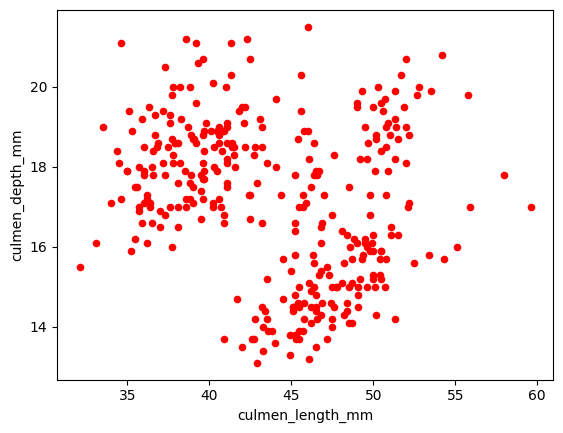

In [3]:
X, Y = data[['culmen_length_mm', 'culmen_depth_mm']], data['species']
X.plot.scatter('culmen_length_mm', 'culmen_depth_mm', color='r')

Quanti cluter possiamo notare in questo grafico bi-dimensionale?
Noi sappiamo che la risposta *dovrebbe* essere 3 (perché 3 sono le classi).
Ma se non conoscessimo le etichetta?

# K-Means Clustering

Dato un dataset in input, l'algoritmo *k-means* produce k cluster il più divisi possibile:

$\min_{S} \sum_{i=0}^k \sum_{x \in S_i} \parallel x - \mu_i \parallel_2^2$

ossia voglio trovare k insiemi di dati disgiunti S più piccoli possibili, ossia che la distanza di un elemento dell'insieme rispetto al **centro di massa** dell'insieme sia prossima a zero.

In questa formulazione, ogni $\mu_i$ rappresenta il centro di massa dell'insieme i-esimo.

<img src="https://d2908q01vomqb2.cloudfront.net/f1f836cb4ea6efb2a0b1b99f41ad8b103eff4b59/2018/11/02/k-means-sagemaker-1.gif">

K-Means è un algoritmo ITERATIVO:
* scelgo k campioni a caso tra i punti
* ad ogni iterazione, calcolo la distanza dei punti da tutti i centri e assegno ogni punto a quello più vicino
* ri-calcolo i centri come la media dei punti dei k cluster

Quindi, l'algoritmo dipende da due parametri: k e le iterazioni.

In [60]:
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, encoder, **params):
    Z = encoder.transform(clf.predict(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_decision_region(clf, X, title, x_label, y_label, centers=None):
    Y = clf.predict(X)
    encoder = LabelEncoder().fit(Y)
    X0, X1 = X[x_label], X[y_label]
    xx, yy = make_meshgrid(X0, X1)
    fig, ax = plt.subplots()
    plot_contours(ax, clf, xx, yy, encoder, cmap=plt.cm.coolwarm, alpha=0.8)
    X.plot.scatter(x_label, y_label, c=Y, cmap=plt.cm.coolwarm, ax=ax)
    if centers is not None:
        ax.scatter(centers[:,0], centers[:,1], c='w', marker='x', linewidth=5)
    ax.set_title(title)


/Users/zangobot/miniconda3/envs/ba2223/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


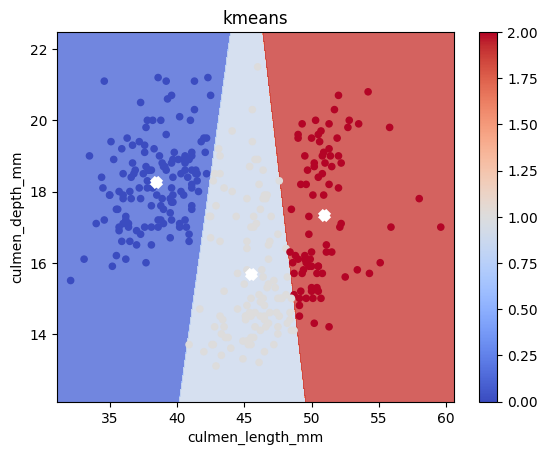

In [51]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='random', max_iter=50, n_init='auto')
kmeans.fit(X)

plot_decision_region(kmeans, X, 'kmeans', 'culmen_length_mm', 'culmen_depth_mm', kmeans.cluster_centers_)

Il dataset non è molto linearmente separabile e K-Means non riesce a separare

/Users/zangobot/miniconda3/envs/ba2223/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/zangobot/miniconda3/envs/ba2223/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/zangobot/miniconda3/envs/ba2223/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/zangobot/miniconda3/envs/ba2223/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/zangobot/miniconda3/envs/ba2223/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


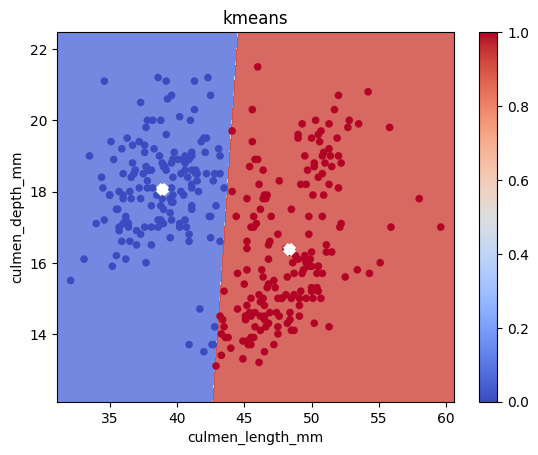

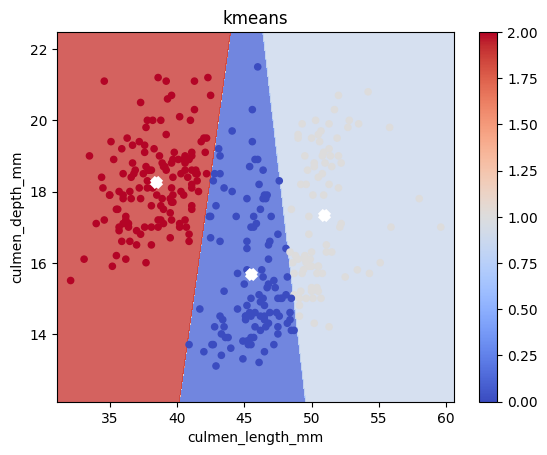

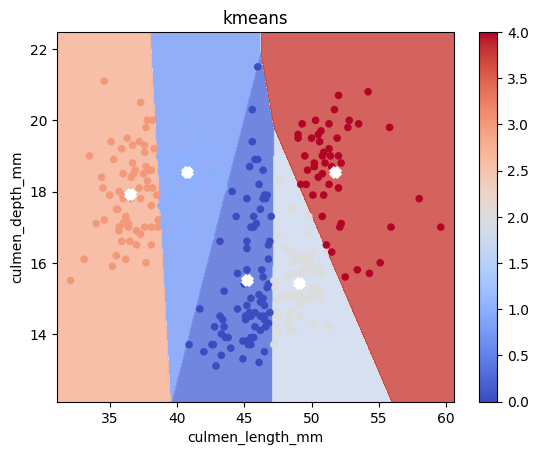

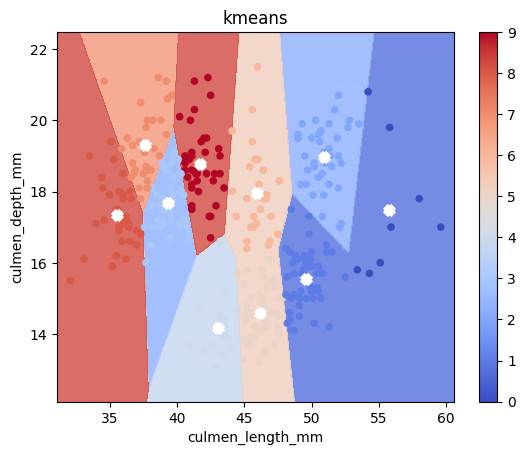

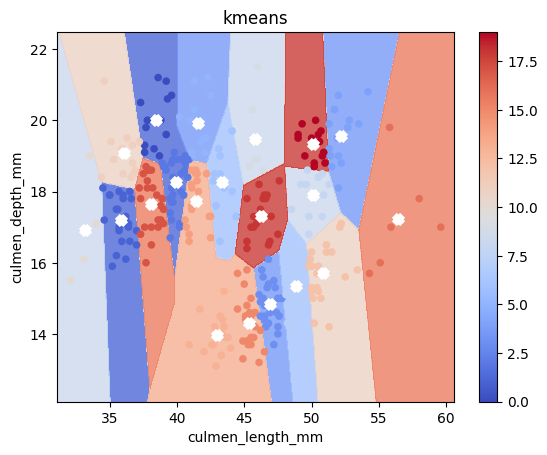

In [15]:
ks = [2, 3, 5, 10, 20]

for k in ks:
    kmeans = KMeans(n_clusters=k, init='random', max_iter=50, n_init='auto')
    kmeans.fit(X)

    plot_decision_region(kmeans, X, 'kmeans', 'culmen_length_mm', 'culmen_depth_mm', kmeans.cluster_centers_)

Quindi, come faccio a capire che in questo dataset ci sono 3 classi?
Non c'è una regola **quantitativa**, ma possiamo avere un'idea di quando K-means inizi ad overfittare i dati: guardiamo la distanza intra e inter cluster.
Ossia, guardiamo quanto ogni cluster è compatto (quindi vicino al centro) e distante dagli altri.
Questo viene calcolato con la silhouette_score.

Oppure, posso usare la distanza dai centri e basta. Questa informazione è già disponibile nell'algoritmo di scikit-learn:

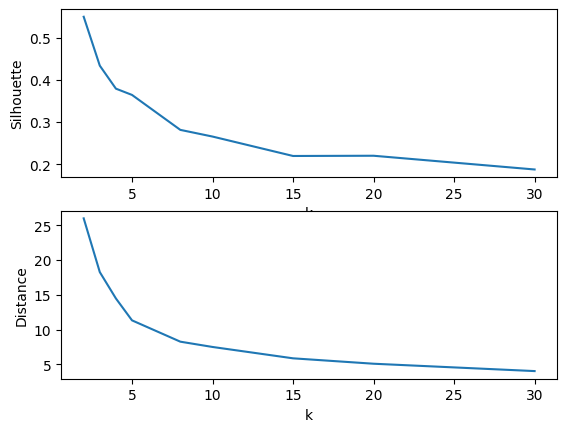

In [47]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

Xd = data[['culmen_length_mm', 'culmen_depth_mm', 'body_mass_g', 'flipper_length_mm']]
Xd = MinMaxScaler().fit_transform(Xd)
ks = [2, 3, 4, 5, 8, 10, 15, 20, 30]
silhouette_scores = []
inertias = []
for k in ks:
    km = KMeans(n_clusters=k, n_init='auto', init='random')
    classes = km.fit_predict(Xd)
    inertias.append(km.inertia_)
    silhouette_scores.append(silhouette_score(Xd, labels=classes))

plt.subplot(2,1,1)
plt.plot(ks, silhouette_scores)
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.subplot(2,1,2)
plt.plot(ks, inertias)
plt.xlabel('k')
plt.ylabel('Distance')
plt.show()

Come potete osservare, intorno a 3,4,5 la curva inizia ad appiattirsi: significa che l'algoritmo non riesce a migliorare più come prima.
Indicativamente, questo vi permette di capire che ci siano da 3 a 5 regioni all'interno dei vostri dati con caratteristiche simili.

Ma questa stima rimane *QUALITATIVA*.

# K-Means ++

L'algoritmo di K-means sceglie i primi centri **a caso**.
Che cosa succede se queti sono scelti male?

Per ovviare a questo problema, esiste l'algoritmo di inizializzazione *k-means++*, che calcola k centroidi che siano tra di loro il più distante possibile.

Possibile problema:
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190812011808/Screenshot-2019-08-12-at-1.13.15-AM.png">

Con k-means++:

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190812011831/Screenshot-2019-08-12-at-1.09.42-AM.png">

In [55]:
k = 5

kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto')
kmeans.fit(Xd)

# Basta specificare init='k-means++', che è il default


KMeans(n_clusters=5, n_init='auto')

# Kernel K-means

Dato che dentro K-means si calcolano distanze, possiamo utilizzare la versione kernel, in cui possiamo calcolare distanze non-lineari per aggiornare i centri.
Non esiste una implementazione di Kernel K-Means in scikit-learn, per cui ecco una versione custom:

In [61]:
"""Kernel K-means"""

# Author: Mathieu Blondel <mathieu@mblondel.org>
# License: BSD 3 clause

from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.utils import check_random_state


class KernelKMeans(BaseEstimator, ClusterMixin):
    """
    Kernel K-means

    Reference
    ---------
    Kernel k-means, Spectral Clustering and Normalized Cuts.
    Inderjit S. Dhillon, Yuqiang Guan, Brian Kulis.
    KDD 2004.
    """

    def __init__(self, n_clusters=3, max_iter=50, tol=1e-3, random_state=None,
                 kernel="linear", gamma=None, degree=3, coef0=1,
                 kernel_params=None, verbose=0):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.kernel = kernel
        self.gamma = gamma
        self.degree = degree
        self.coef0 = coef0
        self.kernel_params = kernel_params
        self.verbose = verbose

    @property
    def _pairwise(self):
        return self.kernel == "precomputed"

    def _get_kernel(self, X, Y=None):
        if callable(self.kernel):
            params = self.kernel_params or {}
        else:
            params = {"gamma": self.gamma,
                      "degree": self.degree,
                      "coef0": self.coef0}
        return pairwise_kernels(X, Y, metric=self.kernel,
                                filter_params=True, **params)

    def fit(self, X, y=None, sample_weight=None):
        n_samples = X.shape[0]

        K = self._get_kernel(X)

        sw = sample_weight if sample_weight else np.ones(n_samples)
        self.sample_weight_ = sw

        rs = check_random_state(self.random_state)
        self.labels_ = rs.randint(self.n_clusters, size=n_samples)

        dist = np.zeros((n_samples, self.n_clusters))
        self.within_distances_ = np.zeros(self.n_clusters)

        for it in range(self.max_iter):
            dist.fill(0)
            self._compute_dist(K, dist, self.within_distances_,
                               update_within=True)
            labels_old = self.labels_
            self.labels_ = dist.argmin(axis=1)

            # Compute the number of samples whose cluster did not change
            # since last iteration.
            n_same = np.sum((self.labels_ - labels_old) == 0)
            if 1 - float(n_same) / n_samples < self.tol:
                if self.verbose:
                    print("Converged at iteration", it + 1)
                break

        self.X_fit_ = X

        return self

    def _compute_dist(self, K, dist, within_distances, update_within):
        """Compute a n_samples x n_clusters distance matrix using the
        kernel trick."""
        sw = self.sample_weight_

        for j in range(self.n_clusters):
            mask = self.labels_ == j

            if np.sum(mask) == 0:
                raise ValueError("Empty cluster found, try smaller n_cluster.")

            denom = sw[mask].sum()
            denomsq = denom * denom

            if update_within:
                KK = K[mask][:, mask]  # K[mask, mask] does not work.
                dist_j = np.sum(np.outer(sw[mask], sw[mask]) * KK / denomsq)
                within_distances[j] = dist_j
                dist[:, j] += dist_j
            else:
                dist[:, j] += within_distances[j]

            dist[:, j] -= 2 * np.sum(sw[mask] * K[:, mask], axis=1) / denom

    def predict(self, X):
        K = self._get_kernel(X, self.X_fit_)
        n_samples = X.shape[0]
        dist = np.zeros((n_samples, self.n_clusters))
        self._compute_dist(K, dist, self.within_distances_,
                           update_within=False)
        return dist.argmin(axis=1)

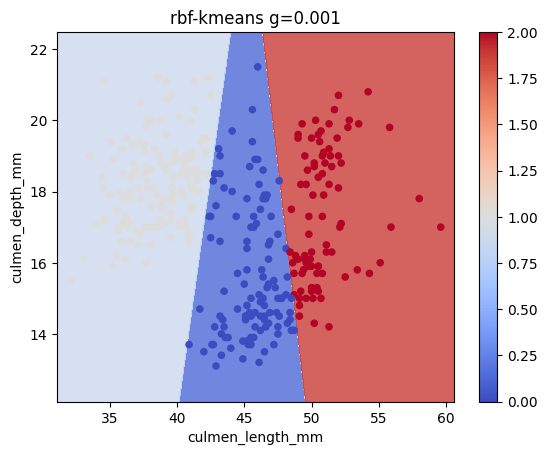

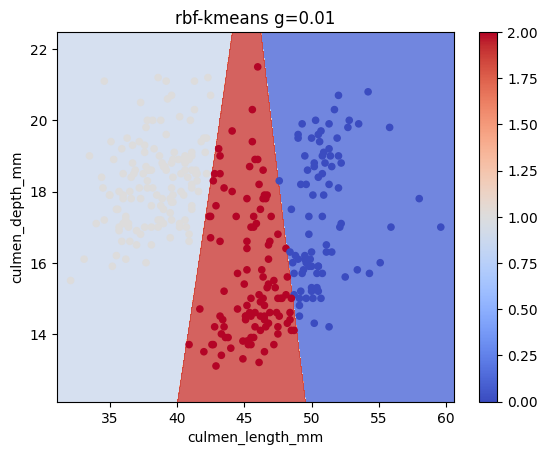

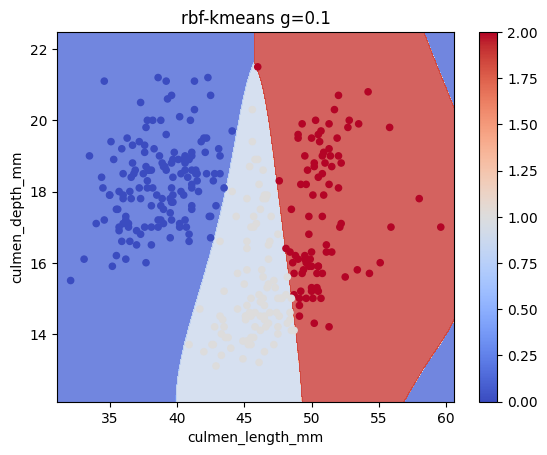

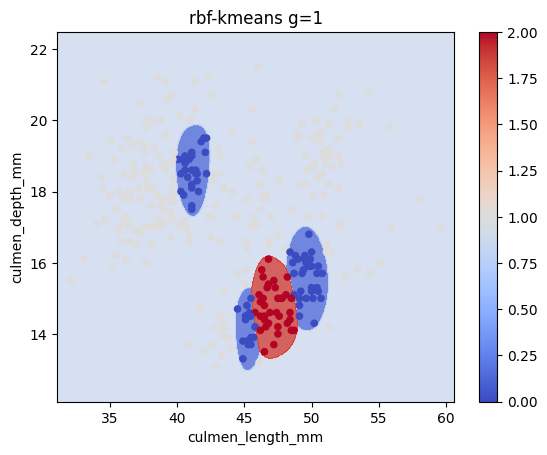

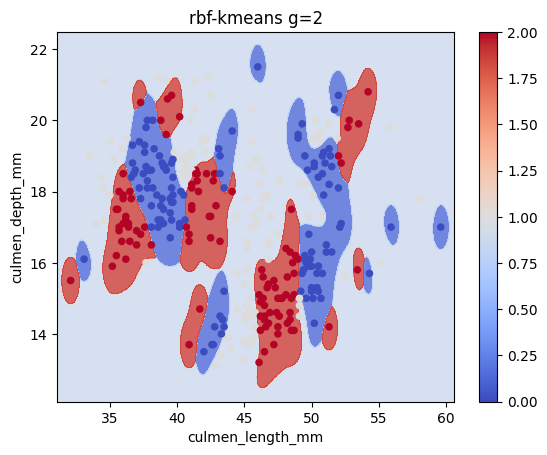

In [66]:
X = data[['culmen_length_mm', 'culmen_depth_mm']]
gammas = [0.001, 0.01, 0.1, 1, 2]
for g in gammas:
    kkmeans = KernelKMeans(kernel='rbf', n_clusters=3, gamma=g)
    kkmeans.fit(X)
    plot_decision_region(kkmeans, X, f'rbf-kmeans g={g}', 'culmen_length_mm', 'culmen_depth_mm')


## Off-topic: Altre applicazioni di K-means

* compressione del colore (dovete bilanciare quanto si degradano i colori)
* compressione del dataset (ogni punto diventa l'indice del centro più vicino)

Prendiamo il secondo caso.
Voglio inviare il dataset dei pinguini a qualcuno.
Per comprimerlo uso K-means e scelgo K in base all'errore di ricostruzione che commetto nel sostutire un punto con il centro più vicino.

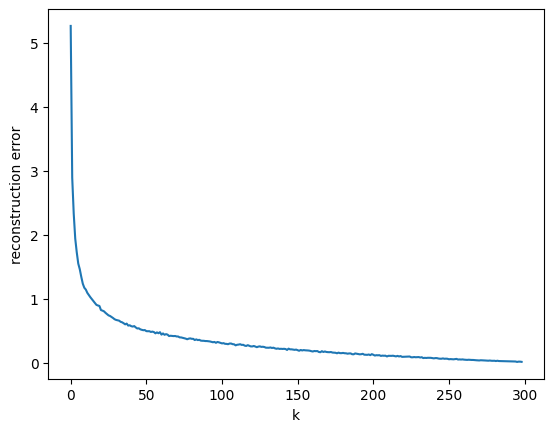

In [21]:
errors = []
ks = range(1, 300)
for k in ks:
    kmeans = KMeans(n_clusters=k, init='random', max_iter=50, n_init='auto')
    kmeans.fit(X)
    Xc = kmeans.cluster_centers_[kmeans.predict(X)]
    norms = np.linalg.norm(X - Xc, axis=1)
    reconstruction_error = norms.mean()
    errors.append(reconstruction_error)
plt.plot(errors)
plt.xlabel('k')
plt.ylabel('reconstruction error')
plt.show()

L'errore va a zero (perché alla fine K-means crea un cluster per sample).
Ma l'errore di ricostruzione è molto basso già con k=150.
Vediamo come diventa il dataset dei pinguini con la compressione a 150 centri:

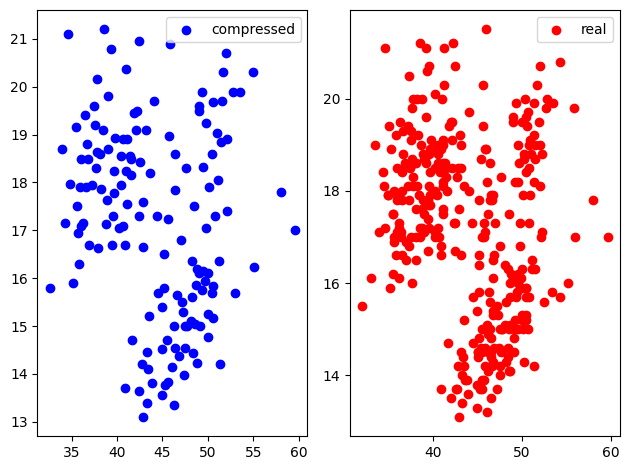

In [33]:
k150 = KMeans(n_clusters=150, n_init='auto', init='random')
k150.fit(X)

plt.subplot(1,2,1)
plt.scatter(k150.cluster_centers_[:, 0], k150.cluster_centers_[:, 1], label="compressed", c='b')
plt.tight_layout()
plt.legend()
plt.subplot(1,2,2)
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], label="real", c='r')
plt.tight_layout()
plt.legend()
plt.show()